In [21]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
# check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
# visualize the distribution of fraud and legitimate transactions
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


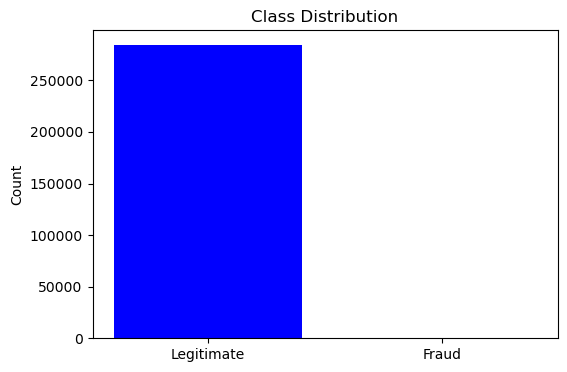

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xticks([0,1], ['Legitimate', 'Fraud'])
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

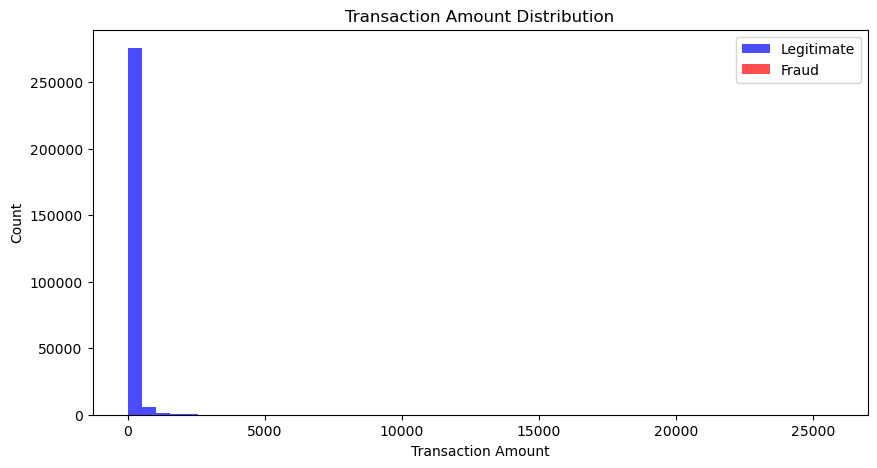

In [37]:
plt.figure(figsize=(10,5))
plt.hist(df[df['Class']==0]['Amount'], bins=50, alpha=0.7, label='Legitimate', color='blue')
plt.hist(df[df['Class']==1]['Amount'], bins=50, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.show()

In [53]:
# normalize features 'time' and 'amount' 

from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

data = df.copy()
data['Amount'] = sc.fit_transform(data[['Amount']].values)
data['Time'] = sc.fit_transform(data[['Time']].values)
print(data[['Amount', 'Time']].head())

     Amount      Time
0  0.244964 -1.996583
1 -0.342475 -1.996583
2  1.160686 -1.996562
3  0.140534 -1.996562
4 -0.073403 -1.996541


In [58]:
# handle data imbalance. 

X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']              # Target ('Class')

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

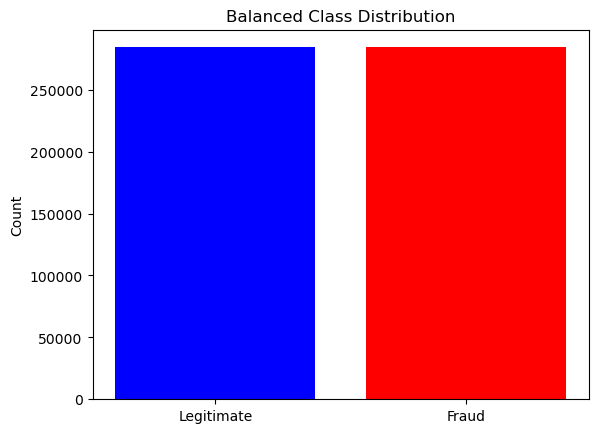

In [60]:
plt.bar([0, 1], [sum(y_resampled == 0), sum(y_resampled == 1)], color=['blue', 'red'])
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.ylabel('Count')
plt.title('Balanced Class Distribution')
plt.show()

In [62]:
# split data into taining and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [65]:
# import model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

#  train a model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_pred))
print('AUC Score:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85295
           1       0.97      0.92      0.95     85294

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

AUC Score: 0.9477866229327425


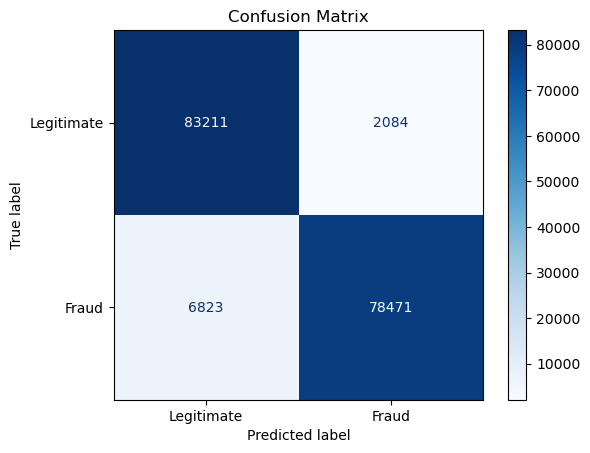

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Legitimate', 'Fraud'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# top left (true negatives) : legit transactions correctly predicted as legitimate
# top right (false positives) : legit transactions falsely predicted as fraud
# bottom right (false negs) : frauds falsely predicted as legit
# bottom left (true positives) : frauds correctly predicted as fraud

''' Accuracy = (TP + TN) / Total Samples = 0.94779 '''

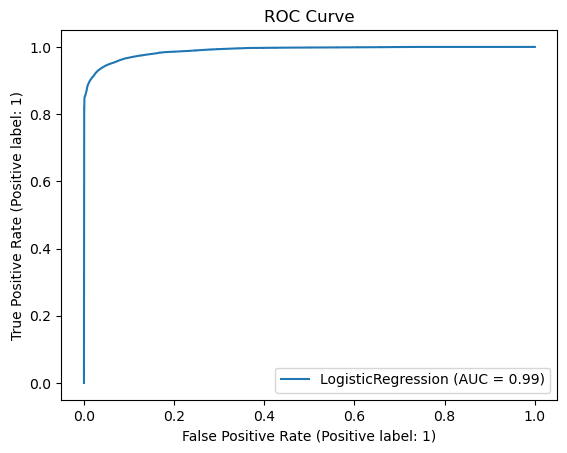

In [69]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()